# Chapter 4a: Basics of feedforward networks

This is the first notebook of our long series on artificial neural networks. We will first learn about the basic principle behind a simple neural network by manually encoding one ourselves! We will then use the standard Python tools to automatise the modelling, by using the Keras module of Tensorflow 2. We will finally investigate the advantages (no feature engineering needed!) and limitations (black-box problem).

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_col

import warnings
warnings.filterwarnings('ignore')

## 1. The Universal Approximation Theorem

To understand the power of artificial neural networks (ANN), we will get some intuition by manually testing that the tuning of various weights $w$ and biases $b$ in an ANN can approximate any function. We will however limit ourselves to aproximating only one function, however a complex one, a seismic waveform. We will first define an ANN from scratch.

### 1.1. Basic concept

The following codes will be used as basis for section 4c when we will learn how to update the artifical neuron parameters during training. Here, we will simply modify those parameters by hand. First, let us better understand how the weight $w$ and bias $b$ change the shape of the activation function:

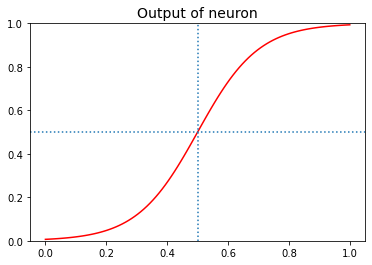

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

xi = np.linspace(0, 1, 100)

### change (w,b) parameters and check impact on activation function
w = 10
b = -5

zi = w * xi + b
plt.plot(xi, sigmoid(zi), 'r')
plt.axvline(x = -b/w, ls=':')
plt.axhline(y = .5, ls=':')
plt.title('Output of neuron', size = 14)
plt.ylim(0,1);

**EXERCISE 1:** Rerun the above cell after changing values of $w$ and $b$. Explain the role of each parameter. Find some value of $w$ and $b$ that permits to approximate a step function (hence moving back to the perception).

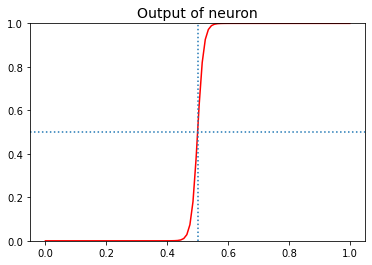

In [4]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

xi = np.linspace(0, 1, 100)

### change (w,b) parameters and check impact on activation function
w = 100
b = -50

zi = w * xi + b
plt.plot(xi, sigmoid(zi), 'r')
plt.axvline(x = -b/w, ls=':')
plt.axhline(y = .5, ls=':')
plt.title('Output of neuron', size = 14)
plt.ylim(0,1);

_YOUR ANSWER HERE_

Let us create our first 3-layer ANN with 1 neuron in the input layer (our $x$), 2 neurons in the hidden layer and 1 neuron in our output layer (our $y$). We need to fix 2 weights $w_{IH}$ between the input and hidden layer (1 neuron times 2 neurons) and 1 bias per hidden neuron $b_H$. We also need to fix 2 weights $w_{HO}$ between the hidden and output layer (2 neurons times 1 neuron) and 1 bias for the output neuron $b_O$.

As you may have noticed above, it is easier to fix $b = -ws$ with $s$ the $x$ value at which we want to observe a step. Also, having $w$ high will give this step-like shape. So we apply this strategy for the parameters between the input and hidden layers (i.e. $w_{IH}$ and $b_H$).

In our simple example, we can see the role of the weights $w_{HO}$ from the hidden layer to the output layer as relative weights to our steps (we will here keep the bias $b_O = 0$). Switching one weight to a negative value will give the final output a "bump" shape. You can now imagine how adding more neurons will lead to any shape we want.

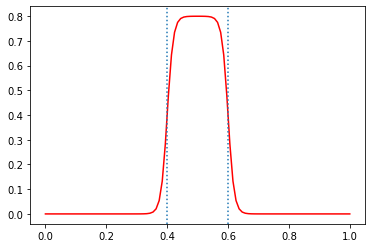

In [9]:
s = np.array([.4, .6])
w_IH = np.array([100, 100])    # high value yields step-like shape
w_HO = np.array([.8, -.8])       # weights the steps

b_H = -w_IH * s
b_O = 0

z1_H = w_IH[0] * xi + b_H[0]
z2_H = w_IH[1] * xi + b_H[1]
y1_H = sigmoid(z1_H)
y2_H = sigmoid(z2_H)

out = w_HO[0] * y1_H + w_HO[1] * y2_H + b_O   # linear activation

plt.plot(xi, out, 'r')
plt.axvline(x = s[0], ls=':')
plt.axvline(x = s[1], ls=':');

We could also notice that the height $h$ of the bump depends on the values of $w_{HO}$. Below we will simplify the procedure by selecting $h$ and fixing $w_{IH_1} = h$ and $w_{IH_2} = -h$.

### 1.2. Manually encoding a simple ANN to fit a complex function

Let us now try to create, manually, an ANN that can predict the portion of a seismic waveform! We will keep it coarse-grained with 5 bins, meaning in our case an ANN architecture 1-10-1. The next cell defines the ad-hoc seismic waveform as a damped sine wave, a crude approximation that only serves a illustration purpose.

In [10]:
# damped sine wave as crude approximation of seismic waveform
ti = np.linspace(0, 1, 100)
A = 10
lbda = 5
w = 3.14*10
phi = 1
yi = A * np.exp(-lbda * ti) * np.cos(w*ti + phi)
yi[0:22] = 0

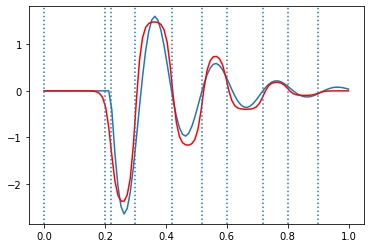

In [11]:
# YOUR CODE HERE
# manually encode the ANN
s = np.array([.0,.2, .22,.3,.42 ,.52,.6, .72, .8,.9])     # binnning done by 10 neurons in hidden layer (to be changed)
h = np.array([0, 0,-2.5,  4,-2.7,2,  -1.2,.6, -.3,.1])                      # change to approximate y

n_H = len(s)
w_IH = np.repeat(100, n_H)                            # step-like, you increase w even more
w_HO = np.array([h[0],h[1], h[2],h[3], h[4],h[5], h[6],h[7], h[8],h[9]])       # weight the steps

b_H = -w_IH * s
b_O = 0

y1_H = sigmoid(w_IH[0] * xi + b_H[0])
y2_H = sigmoid(w_IH[1] * xi + b_H[1])
y3_H = sigmoid(w_IH[2] * xi + b_H[2])
y4_H = sigmoid(w_IH[3] * xi + b_H[3])
y5_H = sigmoid(w_IH[4] * xi + b_H[4])
y6_H = sigmoid(w_IH[5] * xi + b_H[5])
y7_H = sigmoid(w_IH[6] * xi + b_H[6])
y8_H = sigmoid(w_IH[7] * xi + b_H[7])
y9_H = sigmoid(w_IH[8] * xi + b_H[8])
y10_H = sigmoid(w_IH[9] * xi + b_H[9])

out = w_HO[0] * y1_H + w_HO[1] * y2_H + w_HO[2] * y3_H + w_HO[3] * y4_H + w_HO[4] * y5_H + \
    w_HO[5] * y6_H + w_HO[6] * y7_H + w_HO[7] * y8_H + w_HO[8] * y9_H + w_HO[9] * y10_H + b_O 

plt.plot(ti, yi,)
plt.plot(ti, out, 'r')
for x in s:
    plt.axvline(x=x, ls=':')
#plt.axvline(x = s[2], ls=':')
#plt.axvline(x = s[4], ls=':')
#plt.axvline(x = s[6], ls=':')
#plt.axvline(x = s[8], ls=':');

**EXERCISE 2:** Rerun the previous cell by changing $s$ and $h$ to approximate the "seismic waveform" (shown in blue) as closely as possible.

**EXERCISE 3:** Try to improve the fit by adding one or two more neurons.

## 2. Building & training ANN architectures with Tensorflow 2 (Keras)

Keras is an open-source software library that provides a Python interface for artificial neural networks, which acts as an interface for the TensorFlow library. TensorFlow is an open-source machine learning platform developed by Google. We will use Keras quite systematically in our future neural network applications, in the present chapter as well as future ones, as Keras has support also convolutional (and recurrent) neural networks.

In [4]:
import tensorflow as tf
tf.__version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### 2.1. The MNIST database of handwritten digits

The [MNIST](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image (28 × 28 pixel box, i.e. 784 inputs and 10 outputs) (LeCun et al., 1998).

We will use this dataset one more time in the computer vision chapter to compare the performance of CNN models versus standard ANNs and better understand the concept of activation map (see chapter 5).

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


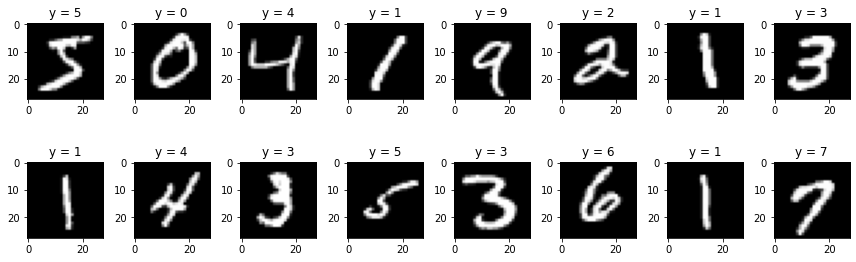

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data ()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


num_row = 2
num_col = 8
num = num_row * num_col
images = X_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('y = {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

y values: [0 1 2 3 4 5 6 7 8 9]


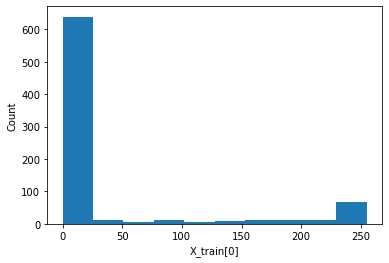

In [67]:
# X range of values
plt.hist(X_train[0].reshape(28*28));
plt.xlabel('X_train[0]')
plt.ylabel('Count')

# y range of values
print("y values:", np.unique(y_train))

**EXERCISE 4:** Explain in words what the histogram represents.

**ANSWER** Count of digital numbers (values) of X_train. For certain sample, value 0 refers to the black pixels, value 1 refers to the white (bright) pixels.

The data must first be reformatted for proper ANN modelling. This includes __normalization__ of the input data and __one-hot encoding__ of the output data.

* _Normalization_: Normalizing the input data helps speed up the training. It also reduces the chance of getting stuck in local optima in stochastic gradient descent
* _One-hot encoding_: Neurons usually output either 0 or 1. Hence, if we have a digit class going from “0” to “9” we will use 10 binary output neurons. This is known as a one-hot encoding. Hence, if the output should be digit 5, the 6th neuron should output 1, and all the remaining should be zeros. Note, that the first neuron is active for a “zero” digit.

In [5]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# input normalization
X_train /= 255           # same as X_train = X_train / 255
X_test /= 255

# one hot encoding of outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train[0]  # example of one-hot encoding

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Let us build a very simple ANN composed of two `Dense` layers (1 hidden + output) by using the function `Sequential` from TensorFlow's Keras. 

In [6]:
model = Sequential([
        Dense(128, activation = 'tanh', input_shape = (784, )),
        Dense(10, activation = 'softmax')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
training_epochs = 20

results = model.fit(
    X_train, y_train,
    epochs = training_epochs,
    validation_data = (X_test, y_test),
    verbose = 0   # 0 to hide the training progress, 1 otherwise
)

Evaluating on training set...
loss = 0.0035, accuracy = 99.9117%
Evaluating on testing set...
loss = 0.1027, accuracy = 97.6100%


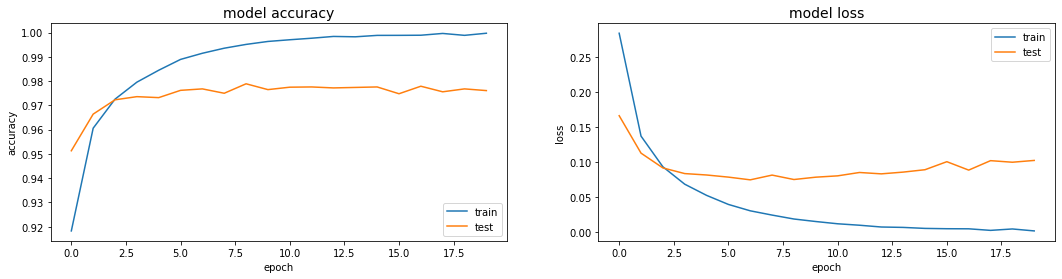

In [9]:
# summarize training history
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

axs[0].plot(results.history['accuracy'])
axs[0].plot(results.history['val_accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('model accuracy', size=14)
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(results.history['loss'])
axs[1].plot(results.history['val_loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('model loss', size=14)
axs[1].legend(['train', 'test'], loc='upper right');

print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train, verbose = 0)
print("loss = {:.4f}, accuracy = {:.4f}%".format(loss, accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose = 0)
print("loss = {:.4f}, accuracy = {:.4f}%".format(loss, accuracy * 100))

The learning curve looks reasonable despite the simplicity of the ANN. We see that the accuracy on the training set is increasing rapidly, indicating that the network is learning relatively fast. After many epochs, the training tends to 100% accuracy due to overfitting. For the test set, we notice that the accuracy remains stable after a few epochs, just below 98% accuracy indicating that the ANN generalizes well to unseen data. The loss curve shows a similar pattern.

Let us now go into more details in Keras parameterization.

The type of `activation` function can be:
* `tanh`, `sigmoid` (legacy functions), `relu` (preferred in deep learning)
* `softmax` (final layer only, multi-class case), `linear` (final layer only, regression case)

Model parameter estimation is done via gradient descent in function `compile`:
* `optimizer`: Updates the weights used in the neural network according to the value of the loss function. There are various optimizer functions such as RMSProp, SGD (stochastic gradient descent), `Adam`. The Adam (adaptive moment estimation) optimizer has become particularly popular in recent years. This algorithm is an extension of SGD.
* `loss`: The function that measures the performance of the ANN over training data (e.g. `categorical_crossentropy` for classification, `mean_squared_error` for regression)
* `metrics`: measure of the performance of the neural network, e.g. `accuracy`, `mse`, etc.

We just built, trained and tested our first ANN on TensorFlow! The accuracy obtained was below 98%, which is very reasonable for a simple dense feedforward neural network.

**EXERCISE 5**: Can you do better by developing a different architecture?

In [5]:
model = Sequential([
        Dense(192, activation = 'relu', input_shape = (784, )),
        Dense(10, activation = 'softmax')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               150720    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1930      
Total params: 152,650
Trainable params: 152,650
Non-trainable params: 0
_________________________________________________________________


In [81]:
training_epochs = 20

results = model.fit(
    X_train, y_train,
    epochs = training_epochs,
    validation_data = (X_test, y_test),
    verbose = 0   # 0 to hide the training progress, 1 otherwise
)

print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose = 0)
print("loss = {:.4f}, accuracy = {:.4f}%".format(loss, accuracy * 100))

Evaluating on training set...
loss = 0.1030, accuracy = 98.1700%


### 2.2. Understanding the power of ANNs: No feature engineering needed

One advantage of ANNs compared to other machines learning techniques such as SVM for instance is that feature engineering is not needed.

Let us consider the _two-spiral dataset_ (Lang & Witbrock, 1988) used in early machine learning studies for benchmarking. The dataset consists of two entangled spirals. Here we use a modified version where noise is added and more data points are defined.

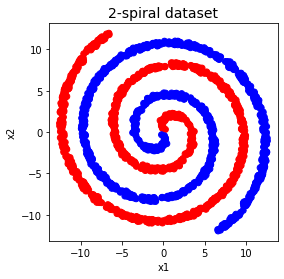

In [12]:
#def spiral():
#    # Lang & Witbrock, 1988 (original with no noise)
#    incr = np.linspace(start = 1, stop = 97, num = 97)
#    angle = np.pi / 16 * incr
#    radius = 6.5 * (104 - incr) / 104
#
#    x1p = radius * np.sin(angle)
#    x2p = radius * np.cos(angle)
#    x1 = np.append(x1p, -x1p)
#    x2 = np.append(x2p, -x2p)
#    y = np.append(np.repeat(1, 97), np.repeat(0, 97))
#    X = np.column_stack((x1, x2))
#    
#    return X, y

# Fix random seed for reproducibility
np.random.seed(1)

def spirals(points, noise = .5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points), np.ones(points))))


X, y = spirals(1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt_col.ListedColormap(['red', 'blue']))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2-spiral dataset', size = 14);

Notice the difficulty to distinguish $y$ classes in this textbook benchmark dataset. Can we retrieve the two spirals using SVM for instance?

**EXERCISE 6:** The SVM model shown below is not able to retrieve the 2 spirals. Apply feature engineering to get a perfect SVM fitting (i.e. 100% accuracy - check chapters 3a and 3c for SVM modeling as well as https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [84]:
from sklearn.svm import SVC

(-11.964530291894839, 11.964530291894839)

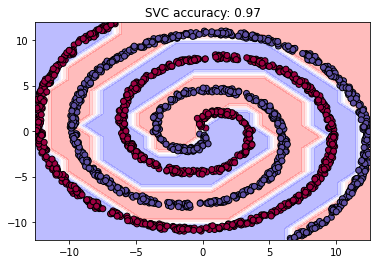

In [132]:
clf=SVC(kernel='rbf',C=1000)
clf.fit(X,y)

#create the mesh
h = 20
x_min, x_max = X[:,0].min(),X[:,0].max()
y_min, y_max = X[:,1].min(),X[:,1].max()
x_ = np.linspace(x_min,x_max,h)
y_ = np.linspace(y_min,y_max,h)
xx, yy = np.meshgrid(x_,y_)

# predict 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   #rearrange the format

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap = plt.cm.bwr, alpha = .3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral', edgecolors='black')
plt.title('SVC accuracy: %.2f'%clf.score(X,y))
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

You may have noticed that a trial-and-error method of feature engineering is needed to get it right. Is feature enngineering also needed with an ANN?

**EXERCISE 7:** Develop a simple ANN using `Sequential` and show the result on the 2-spiral dataset using the same plotting approach as done for the SVM. Note that we will use 500 epochs and a learning rate of 0.01 (used in `tf.keras.optimizers.Adam`). Note that the predicted values for the mesh are obtained with `model.predict_classes` (`model_SVM.predict` for the SVM above, for comparison).

In [14]:
model_ANN = Sequential([
    Dense(34, activation='tanh',input_shape = (2,)),
    Dense(1, activation = 'sigmoid'),
])
model_ANN.summary()
model_ANN.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=.01))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 34)                102       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 35        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


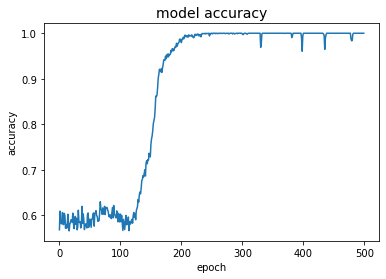

In [15]:
training_epochs = 500

results_ANN = model_ANN.fit(
    X,y,
    epochs = training_epochs,
    verbose = 0   # 0 to hide the training progress, 1 otherwise
)

fig, axs = plt.subplots()

plt.plot(results_ANN.history['accuracy'])   # here, results_ANN = model_ANN.fit(...)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy', size=14);

In [16]:
import gc
gc.collect()

26847

(-11.964530291894839, 11.964530291894839)

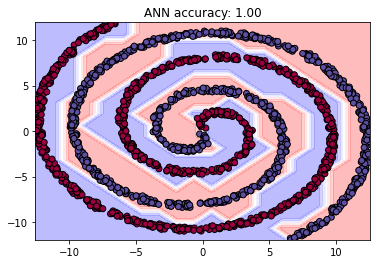

In [17]:
# YOUR CODE CONTINUES HERE
#create the mesh
h = 20
x_min, x_max = X[:,0].min(),X[:,0].max()
y_min, y_max = X[:,1].min(),X[:,1].max()
x_ = np.linspace(x_min,x_max,h)
y_ = np.linspace(y_min,y_max,h)
xx, yy = np.meshgrid(x_,y_)

# predict 
Z = model_ANN.predict_classes(np.c_[xx.ravel(), yy.ravel()])   #rearrange the format

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap = plt.cm.bwr, alpha = .3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral', edgecolors='black')
loss,accuracy = model_ANN.evaluate(X, y, verbose = 0)
plt.title('ANN accuracy: %.2f'%accuracy)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
# plotting part

As you should notice, a simple ANN is able to retrieve the 2 spirals while no feature engineering needed on $X = (x_1, x_2)$.

### 2.3. Understanding the limits of ANNs: The blackbox problem

We will now go back to the aftershock dataset considered in chapter 2d. Recall that we originall used a logistic regression to predict the location of aftershocks, following the Nature comment by Mignan & Broccardo (2019). That work was made in response to the use of deep learning for aftershock prediction (deVries et al., 2018).

You will now reproduce the 2018 Nature study, which was highly mediatized back in 2018. Let us first load and filter the data as done in chapter 2 (first, you may move the `aftershocks` data folder from chapter 2 to chapter 4).

In [33]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import os
import h5py

# import xyz grid features X and label y
directory = "data/aftershocks/AllCSV/" "D:/MLGeo-Data/AllCSV"
file_list = os.listdir(directory)
n_files = len(file_list)
file_list.sort()    # will sort files per mainshock date

In [34]:
indata = []
for i in range(len(file_list)):
    mainshock_name = 's' + file_list[i][0:file_list[i].find('_')]
    df_tmp = pd.read_csv(directory + file_list[i])
    df_tmp['ID'] = np.repeat(mainshock_name, len(df_tmp))  #add ID = SRCMOD EventTAG
    indata.append(df_tmp)

data_xyz = pd.concat(indata)
data_xyz

,x,y,z,stresses_full_xx,stresses_full_xy,stresses_full_yy,stresses_full_xz,stresses_full_yz,stresses_full_zz,stresses_full_max_shear,stresses_full_cfs_1,stresses_full_cfs_2,stresses_full_cfs_3,stresses_full_cfs_4,von_mises,aftershocksyn,ID
0,228050.836661,3.438285e+06,-2500.0,-2643.095958,-303.314853,-8306.190130,-62.011213,-591.513951,-23.523893,4191.904227,1278.439670,-1609.139444,1609.139444,-1278.439670,7423.266049,0.0,s1968HYUGAx01YAGI
1,233050.836661,3.438285e+06,-2500.0,-2506.143012,33.487142,-8293.837540,-40.272330,-619.872533,-25.140746,4180.998624,1353.632905,-1706.330567,1706.330567,-1353.632905,7427.854270,0.0,s1968HYUGAx01YAGI
2,238050.836661,3.438285e+06,-2500.0,-2390.411001,381.016088,-8149.157556,-16.212656,-642.672511,-26.597214,4124.540863,1417.713571,-1789.742291,1789.742291,-1417.713571,7351.107005,0.0,s1968HYUGAx01YAGI
3,243050.836661,3.438285e+06,-2500.0,-2299.362270,723.248609,-7868.650242,9.526966,-659.035520,-27.846052,4021.524131,1466.875844,-1854.619572,1854.619572,-1466.875844,7190.271468,0.0,s1968HYUGAx01YAGI
4,248050.836661,3.438285e+06,-2500.0,-2233.960345,1043.357897,-7454.950559,36.174998,-668.289344,-28.844615,3872.648486,1497.602675,-1896.565287,1896.565287,-1497.602675,6945.768984,0.0,s1968HYUGAx01YAGI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,471380.946671,3.728423e+05,-47500.0,710.070096,-5251.054285,20733.987163,3930.203536,-13850.221996,6977.127223,16310.109019,417.800762,18473.143597,-18473.143597,-417.800762,31926.296190,0.0,s2012SUMATR03HAYE
19286,476380.946671,3.728423e+05,-47500.0,-164.919780,-3727.184738,21334.860100,3037.909222,-14138.938807,7085.178929,16380.178960,2239.826880,17679.774101,-17679.774101,-2239.826880,32062.752645,0.0,s2012SUMATR03HAYE
19287,481380.946671,3.728423e+05,-47500.0,-890.077876,-2014.391626,21532.007086,2048.836758,-14190.819417,7084.631269,16293.859627,4189.875411,16435.664962,-16435.664962,-4189.875411,31881.669627,0.0,s2012SUMATR03HAYE
19288,486380.946671,3.728423e+05,-47500.0,-1420.487894,-172.251740,21270.116357,995.878922,-13978.127096,6964.239908,16053.195403,6190.300322,14749.045895,-14749.045895,-6190.300322,31371.023080,0.0,s2012SUMATR03HAYE


Recall that we need to filter the data. First the data is unbalanced with most cells empty. After balancing the data, we need to further split it into traning and test sets. For this, we use the same mainshock ID split as done in De Vries et al. (2018) (as given in the files `Training_FileNames.h5` and `Testing_FileNames.h5`).

In [35]:
# unbalanced towards 0 values
data_xyz_1s = data_xyz.loc[data_xyz['aftershocksyn'] == 1]
data_xyz_0s = data_xyz.loc[data_xyz['aftershocksyn'] == 0]
numberOf0s = len(data_xyz_0s)
numberOf1s = len(data_xyz_1s)
[numberOf0s, numberOf1s, numberOf0s/(numberOf0s+numberOf1s)]

[6019888, 101322, 0.9834473903035511]

In [36]:
# subsample 0s - we use the same approach as in DeVries18 for consistency
# subsampling here reduces the number of samples from 6+ million to c. 200,000
random_subsample0 = np.random.choice(numberOf0s, numberOf1s)
data_xyz_0s = data_xyz_0s.iloc[random_subsample0]
data_xyz_balanced = data_xyz_1s.append(data_xyz_0s)
[len(data_xyz_1s), len(data_xyz_0s)]

[101322, 101322]

In [37]:
# data split
h5file1 = h5py.File("data/aftershocks/Training_FileNames.h5")
training_filenames = np.array(h5file1.get('file_names_training'))
h5file2 = h5py.File("data/aftershocks/Testing_FileNames.h5")
testing_filenames = np.array(h5file2.get('file_names_testing'))
[len(training_filenames), len(testing_filenames)]

[142, 57]

In [38]:
training_IDs_temp = map(lambda x: str(x, 'utf-8'), training_filenames)         #from byte to string
training_IDs = list(map(lambda x: 's' + x[0:x.find('_')], training_IDs_temp))  #extract event tag only
testing_IDs_temp = map(lambda x: str(x, 'utf-8'), testing_filenames)           #from byte to string
testing_IDs = list(map(lambda x: 's' + x[0:x.find('_')], testing_IDs_temp))    #extract event tag only

TrainingSet = data_xyz_balanced.loc[data_xyz_balanced['ID'].isin(training_IDs)]
TestingSet = data_xyz_balanced.loc[data_xyz_balanced['ID'].isin(testing_IDs)]

TrainingSet = shuffle(TrainingSet)

TrainingSet.columns

Index(['x', 'y', 'z', 'stresses_full_xx', 'stresses_full_xy',
       'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz',
       'stresses_full_zz', 'stresses_full_max_shear', 'stresses_full_cfs_1',
       'stresses_full_cfs_2', 'stresses_full_cfs_3', 'stresses_full_cfs_4',
       'von_mises', 'aftershocksyn', 'ID'],
      dtype='object')

**EXERCISE 8:** Based on the following excerpt of the paper, define the model `model_DNN` (DNN for deep neural network):

"_The neural networks used here are fully connected and have six hidden layers with 50 neurons each and hyperbolic tangent activation functions (13,451 weights and biases in total). The first layer corresponds to the inputs to the neural network; in this case, these inputs are the magnitudes of the six independent components of the co-seismically generated static elastic stress-change tensor calculated at the centroid of a grid cell and their negative values. In neural networks designed for binary classification problems, the final layer is often a single sigmoid. In our case, the output of this final neuron may be interpreted as the predicted probability that a grid cell generates one or more aftershocks._"

We also learn in the Methods section that they used "_an adaptive learning rate (Adadelta) optimization method, and a binary cross-entropy cost function_" (respectively `adadelta` and `binary_crossentropy`). Moreover, they used the concept of __dropout__ to limit overfitting. They applied it to all hidden layers with 50% dropout rate. Simply add `Dropout(.5),` after each `Dense(...),` line.

Check with `model_DNN.summary()` that you obtain the correct number of free parameters, which is "_13,451 weights and biases in total_". Compile your model.

In [ ]:
# YOUR CODE HERE
#model_DNN = ?

**EXERCISE 9:** Calculate the number of free parameters based on the architecture defined above. You should obtain 13,451.

In [ ]:
# YOUR CODE HERE

**EXERCISE 10:** Train the model on the `TrainingSet` dataframe, predict aftershocks for the `TestingSet` and determine the AUC of the model (go back to chapter 2d for more details about AUC). Make sure to use the same features as engineered in De Vries et al. (2018). One more information: Since the features are high values, "normalise" by multiplying your features by $10^{-6}$. _Hint:_ We list the available parameters available for feature definition below:

In [40]:
TrainingSet.columns

Index(['x', 'y', 'z', 'stresses_full_xx', 'stresses_full_xy',
       'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz',
       'stresses_full_zz', 'stresses_full_max_shear', 'stresses_full_cfs_1',
       'stresses_full_cfs_2', 'stresses_full_cfs_3', 'stresses_full_cfs_4',
       'von_mises', 'aftershocksyn', 'ID'],
      dtype='object')

In [41]:
#YOUR CODE HERE

In [43]:
#YOUR CODE HERE

AUC of deep neural network: 0.8411065192311993


Let us compare with the logistic regression of chapter 2d.

**EXERCISE 11:** Rerun the logistic regression of chapter 2d and compare the result to the above deep ANN (or DNN) on a ROC diagram.

AUC of logistic regression with von Mises feature: 0.8482520172464317


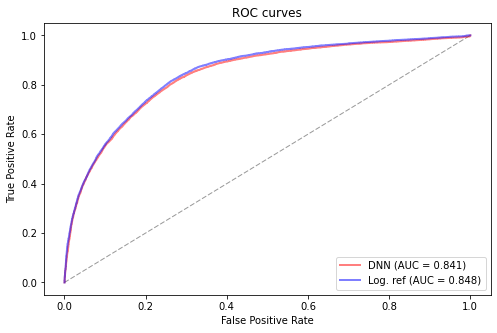

In [44]:
# YOUR CODE HERE

The authors of the 2018 paper concluded "_We find that the learned aftershock pattern is physically interpretable: the maximum change in shear stress, the von Mises yield criterion (a scaled version of the second invariant of the deviatoric stress-change tensor) and the sum of the absolute values of the independent components of the stress-change tensor each explain more than 98 per cent of the variance in the neural-network prediction. This machine-learning- driven insight provides improved forecasts of aftershock locations and identifies physical quantities that may control earthquake triggering during the most active part of the seismic cycle._"

**EXERCISE 12:** List the problems of this study (can be related to feature engineering, complexity of the model, interpretability of the results).

_YOUR ANSWER HERE_

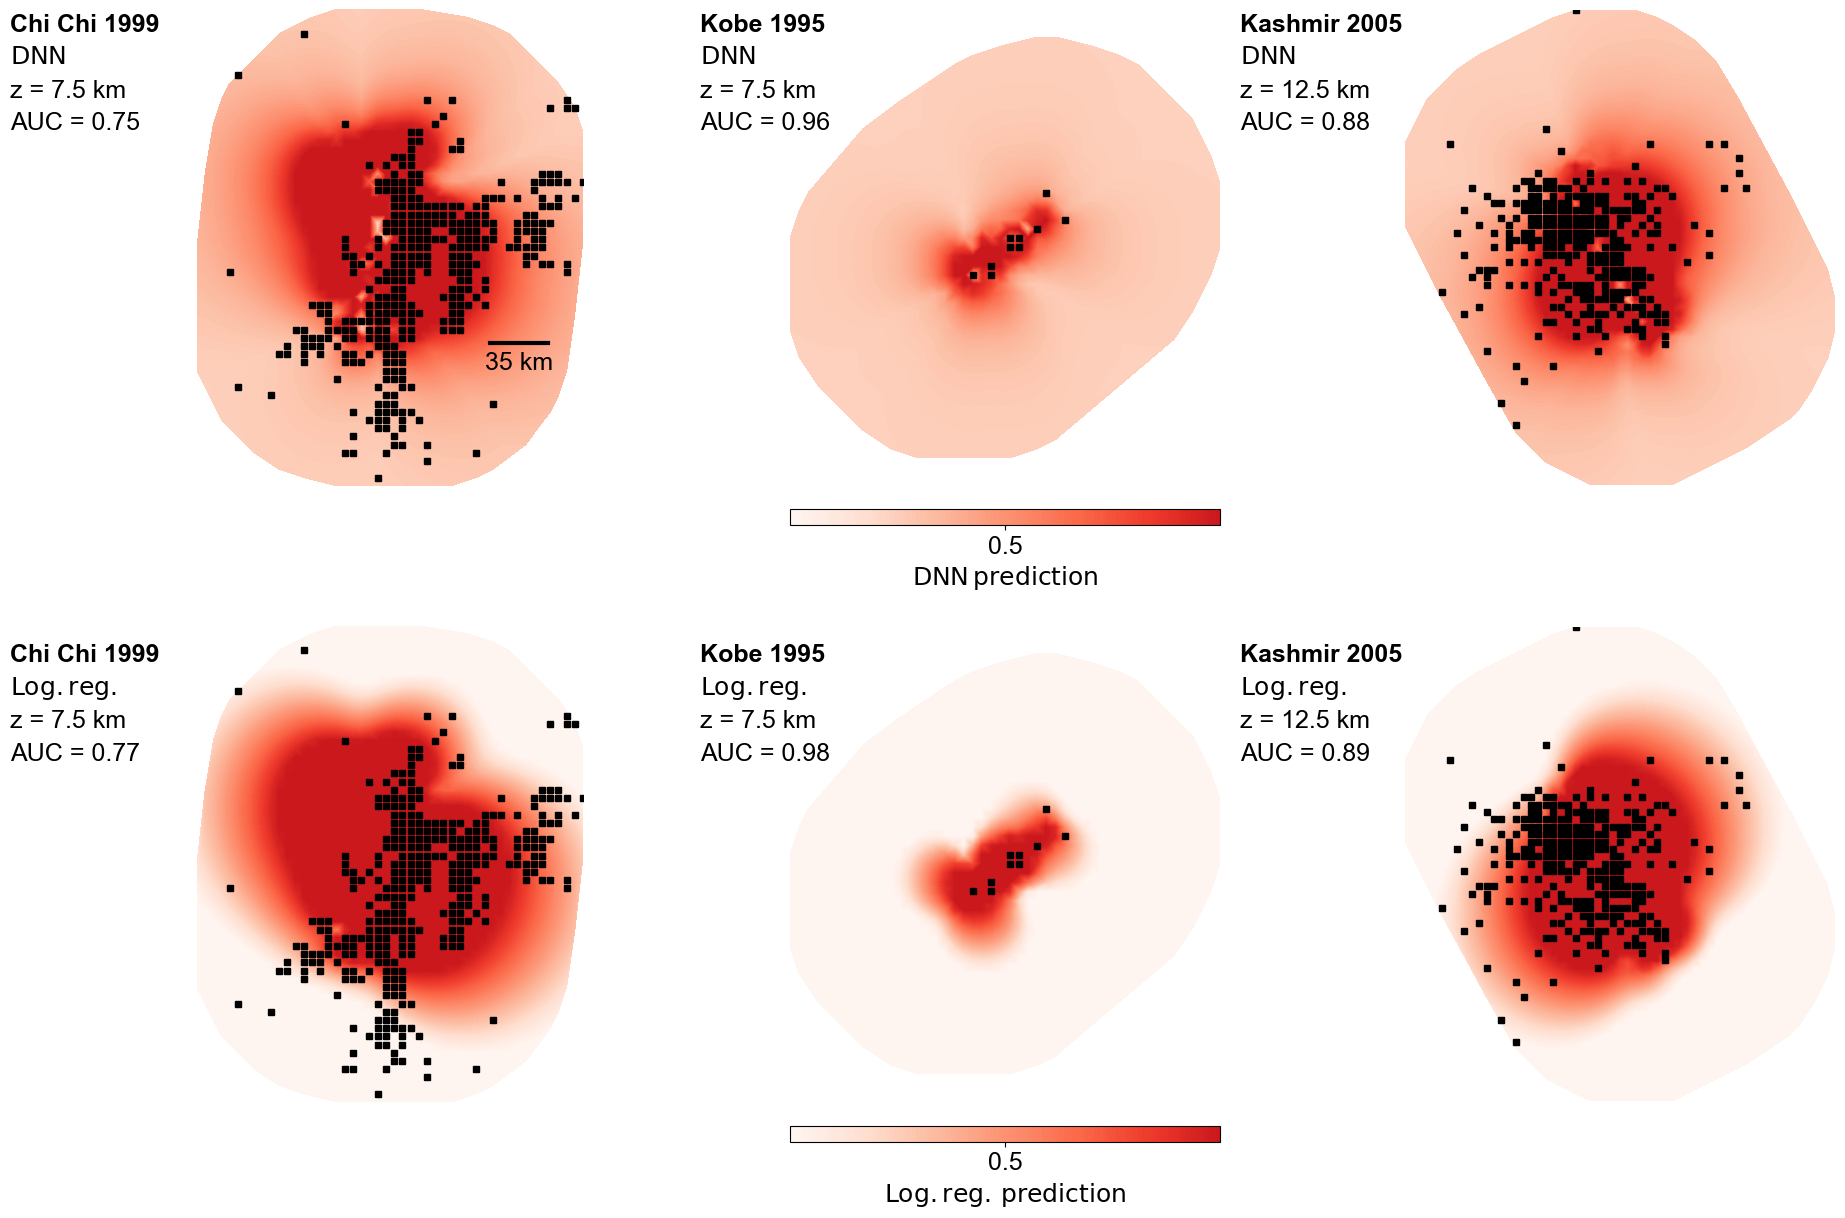

In [45]:
## PLOTTING OF AFTERSHOCK PREDICTION MAPS (optional) ##
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#define figure parameters
min_val_big = 0.4
max_val_big = 0.6
fontsize = 18  #22
#slip distributions to plot
eventTags = ['s1999CHICHI01MAxx', 's1995KOBEJA01YOSH', 's2005KASHMI01SHAO']
sublabels = [['Chi Chi 1999', 'Kobe 1995', 'Kashmir 2005'] ,['Chi Chi 1999', 'Kobe 1995', 'Kashmir 2005']]

fig = plt.figure(facecolor='white', figsize=(30, 15), dpi=100)
depth_vec = [-7500., -7500., -12500.]
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
gs = gridspec.GridSpec(4, 8,
                       width_ratios=[1, .2, 1, .2, 1, .2, 1, .001],
                       height_ratios=[30, 1, 30, 1]
                       )
rowscale = 2
cmap = plt.get_cmap('Reds')
new_cmap = truncate_colormap(cmap, 0.0, 0.75)

#loop over slip distributions
for i in range(len(eventTags)):

    #read in data
    df_eventTag = data_xyz.loc[(data_xyz['ID'] == eventTags[i])
                                & (data_xyz['z'] == depth_vec[i])]
    grid_aftershock_count = np.double(df_eventTag['aftershocksyn'])

    #DNN: run model prediction for this slip distribution - we first define the 12 features
    df_eventTag_DeVries18_origFeatures = df_eventTag[['stresses_full_xx', 'stresses_full_xy',
       'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz', 'stresses_full_zz',
       'aftershocksyn', 'ID']]
    origFeatures = ['stresses_full_xx', 'stresses_full_xy', 'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz', 'stresses_full_zz']
    posabs = ['posabsxx', 'posabsxy', 'posabsyy', 'posabsxz', 'posabsyz', 'posabszz']
    negabs = ['negabsxx', 'negabsxy', 'negabsyy', 'negabsxz', 'negabsyz', 'negabszz']
    df_eventTag_DeVries18_engFeatures = pd.DataFrame()
    df_eventTag_DeVries18_engFeatures[['ID', 'aftershocksyn']] = df_eventTag_DeVries18_origFeatures[['ID', 'aftershocksyn']]
    df_eventTag_DeVries18_engFeatures[posabs] = abs(df_eventTag_DeVries18_origFeatures[origFeatures]) * 1e-6
    df_eventTag_DeVries18_engFeatures[negabs] = -abs(df_eventTag_DeVries18_origFeatures[origFeatures]) * 1e-6
    features = ['posabsxx', 'posabsxy', 'posabsyy', 'posabsxz', 'posabsyz', 'posabszz',
           'negabsxx', 'negabsxy', 'negabsyy', 'negabsxz', 'negabsyz', 'negabszz']
    target = 'aftershocksyn'
    x_test_EventTag = np.array(df_eventTag_DeVries18_engFeatures[features])
    y_test_EventTag = np.array(df_eventTag_DeVries18_engFeatures[target])
    pred_DNN = model_DNN.predict(x_test_EventTag)

    x1_test = np.log(df_eventTag['von_mises']).values.reshape(-1,1)
    pred_logreg = logreg_model.predict_proba(x1_test)[:, 1]

    # AUC estimates
    fpr_DNN, tpr_DNN, _ = roc_curve(y_test_EventTag, pred_DNN)
    auc_DNN = auc(fpr_DNN, tpr_DNN)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test_EventTag, pred_logreg)
    auc_logreg = auc(fpr_logreg, tpr_logreg)
    
    x_temp = np.double(df_eventTag['x'])
    y_temp = np.double(df_eventTag['y'])
    grid_aftershock_count_temp = np.double(df_eventTag['aftershocksyn'])

    for j in range(0, 2):
        ax = plt.subplot(gs[j*2, i*rowscale])
        contour_levels = np.linspace(min_val_big, max_val_big, 100)

        if j==0:
            field_temp = pred_DNN[:,0]
        else:
            field_temp = pred_logreg

        field_temp[np.where(field_temp >= max_val_big)] = max_val_big - 0.001
        field_temp[np.where(field_temp < min_val_big)] = min_val_big + 0.001
        cs = plt.tricontourf(x_temp, y_temp, field_temp, contour_levels, cmap=new_cmap, origin='lower', hold='on', vmin=min_val_big, vmax=max_val_big, lw = 0.1)
        cs = plt.tricontourf(x_temp, y_temp, field_temp, contour_levels, cmap=new_cmap, origin='lower', hold='on', vmin=min_val_big, vmax=max_val_big)
        plt.clim(min_val_big, max_val_big)

       #deal with scale bar
       if ((i == 0) & (j == 0)): #plot scale bar in first subplot
            range_x = np.max(x_temp)-np.min(x_temp)
            range_y = np.max(y_temp)-np.min(y_temp)
            startx = np.min(x_temp)+ 0.76*range_x
            starty = np.min(y_temp)+ 0.3*range_y
            plt.plot([startx, startx+35000], [starty, starty], 'k', linewidth=3)
            plt.text(startx+17500, starty-12000, '35 km', fontsize=fontsize, ha='center', va='center')

       #deal with colorbars
       if ((i == 1) & (j == 0)): # plot first color bar in row 1
            colorax = plt.subplot(gs[1, rowscale])
            colorbar1 = Colorbar(ax = colorax, mappable = cs, orientation = 'horizontal', ticklocation = 'bottom', ticks = [0.2, 0.5, 0.8])
            colorbar1.ax.tick_params(labelsize=fontsize)
            colorbar1.set_label('$\mathrm{DNN}\,\mathrm{prediction}$', size=fontsize)
            pos = colorax.get_position() # get the original position
            colorax.set_position([pos.x0, pos.y0+0.017, pos.width, pos.height])
        if ((i == 1) & (j == 1)): # plot first color bar in row 3
            colorax = plt.subplot(gs[j*2+1, i*rowscale])
            colorbar2 = Colorbar(ax = colorax, mappable = cs, orientation = 'horizontal', ticklocation = 'bottom', ticks = [0.2, 0.5, 0.8])
            colorbar2.ax.tick_params(labelsize=fontsize)
            colorbar2.set_label('$\mathrm{Log. reg.}\,\mathrm{prediction}$', size=fontsize)
            pos = colorax.get_position() # get the original position
            colorax.set_position([pos.x0, pos.y0, pos.width, pos.height])

        ax = plt.subplot(gs[j*2, i*rowscale])

       # count and plot aftershocks at the depth of interest
       n_cells = 0
        for i_isc in range(0, len(x_temp)):
            if grid_aftershock_count_temp[i_isc] > 0:
                plt.plot(x_temp[i_isc], y_temp[i_isc], 's', color = [0.0, 0.0, 0.0], markersize=5)
                n_cells += 1

       # add labels
        xpos = [0.07, 0.3, 0.48, 0.67]
        ypos = [0.87, 0.45]
        spacing = 0.022
        stringlabel = sublabels[j][i]
        plt.text(xpos[i], ypos[j], stringlabel, fontweight = 'bold', fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
        if j == 0: plt.text(xpos[i], ypos[j]-spacing, '$\mathrm{DNN}$', fontsize=fontsize, ha='left', va='center',transform=fig.transFigure)
        if j == 1: plt.text(xpos[i], ypos[j]-spacing, '$\mathrm{Log. reg.}$', fontsize=fontsize, ha='left', va='center',transform=fig.transFigure)
        plt.text(xpos[i], ypos[j]-2*spacing, 'z = ' + str(abs(depth_vec[i])/1e3) + ' km', fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
        if j == 0: plt.text(xpos[i], ypos[j]-3*spacing, 'AUC = ' + str(round(auc_DNN,2)), fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
        if j == 1: plt.text(xpos[i], ypos[j]-3*spacing, 'AUC = ' + str(round(auc_logreg,2)), fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
        pos = ax.get_position() # get the original position
        if j == 1: ax.set_position([pos.x0, pos.y0-0.017, pos.width, pos.height])

       #plot decorations
        plt.axis('equal')
        plt.axis('tight')
        plt.axis('scaled')
        plt.axis('off')
        ax.set_xticks([])
        ax.set_yticks([])

### 2.5. References

* De Vries et al. (2018), Deep learning of aftershock patterns following large earthquakes, Nature, 560, 632-634
* Lang & Witbrock (1988), Learning to Tell Two Spirals Apart, The 1988 Connectionist Models Summer School (Pittsburgh, PA), 52-59
* LeCun et al. (1998), Gradient-Based Learning Applied to Document Recognition, Proc. IEEE, Nov. issue, 1-46
* Mignan & Broccardo (2019), One neuron versus deep learning in aftershock prediction, Nature, 574, E1-E3